<a href="https://colab.research.google.com/github/KalpitWalekar/Prepinsta/blob/main/Prepinsta_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Murder Mystery

##Installing SQLite3

In [ ]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1770 sha256=b16dcb6ff8e05729ead73a187668c377b29ccec788bd9704be11a5e36b4d77cf
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3874 sha256=237f81a3109edd275055ebec1f5fb82e75f2ec696013f8cd36cb4be487a09c64
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31665 sha256=88cf21cd45635f82c546652f8b6af58b301092a17540cf619d82bdd8fa887758
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

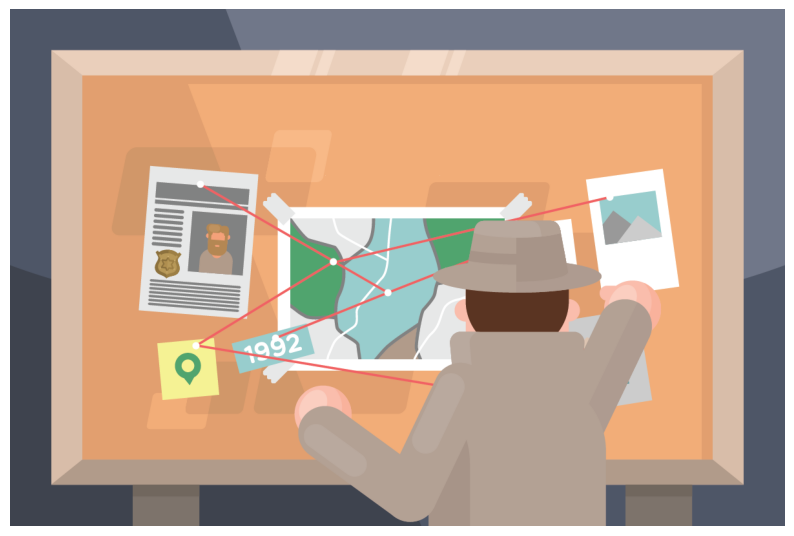

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
img = Image.open('/content/gdrive/My Drive/python_docs/detective.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
import sqlite3
db=sqlite3.connect('/content/gdrive/My Drive/python_docs/sql-murder-mystery.db')

Mounted at /content/gdrive


##Solution

Thus Let's Start solving our puzzle. So the detective needs information or clues to move forward. Now the only clues you have is "the crime was a *​murder*​ that occurred sometime on *​Jan.15, 2018*​ and that it took place in *​SQL City*."

So Let's Start Searching for new clues.

In [ ]:
pd.read_sql_query('''
Select * from sqlite_master
''',db)

,type,name,tbl_name,rootpage,sql
0,table,crime_scene_report,crime_scene_report,2,CREATE TABLE crime_scene_report (\n dat...
1,table,drivers_license,drivers_license,3,CREATE TABLE drivers_license (\n id int...
2,table,person,person,4,CREATE TABLE person (\n id integer PRIM...
3,table,facebook_event_checkin,facebook_event_checkin,5,CREATE TABLE facebook_event_checkin (\n ...
4,table,interview,interview,6,CREATE TABLE interview (\n person_id in...
5,table,get_fit_now_member,get_fit_now_member,7,CREATE TABLE get_fit_now_member (\n id ...
6,index,sqlite_autoindex_get_fit_now_member_1,get_fit_now_member,8,None
7,table,get_fit_now_check_in,get_fit_now_check_in,9,CREATE TABLE get_fit_now_check_in (\n m...
8,table,income,income,10,CREATE TABLE income (\n ssn integer PRI...
9,table,solution,solution,11,"CREATE TABLE solution (\n user integer,..."


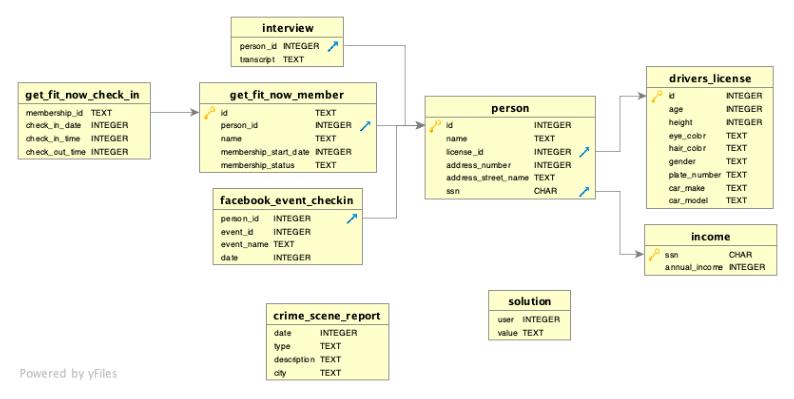

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
img2 = Image.open('/content/gdrive/My Drive/python_docs/schema.png')
plt.figure(figsize=(10, 8))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [ ]:
pd.read_sql_query('''
Select * from crime_scene_report
''',db)

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,be NO mistake about it: it was neither more no...,Trenton


In [ ]:
pd.read_sql_query('''
Select * from crime_scene_report
where city = "SQL City" and type = "murder"
and date = 20180115
order by date
''',db)

,date,type,description,city
0,20180115,murder,Security footage shows that there were 2 witne...,SQL City


Clues: Security footage shows that there were 2 witnesses. The first witness lives at the last house on "Northwestern Dr". The second witness, named Annabel, lives somewhere on "Franklin Ave".

In [ ]:
#Searching for 1st Witness
pd.read_sql_query('''
Select * from person
where address_street_name = "Northwestern Dr"
order by address_number desc limit 1
''',db)

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


Witness:1

ID: 14887

Name: Morty Schapiro

In [ ]:
#Searching for 2nd Witness
pd.read_sql_query('''
Select * from person
where address_street_name = "Franklin Ave"
and name like "%annabel%"
''',db)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


Witness:2

ID: 16371

Name: Annabel Miller

In [ ]:
#Reading their interview reports/transcripts
pd.read_sql_query('''
Select * from interview where person_id in (14887,16371)
''',db)

,person_id,transcript
0,14887,I heard a gunshot and then saw a man run out. ...
1,16371,"I saw the murder happen, and I recognized the ..."


Statements of Witnesses


* I heard a gunshot and then saw a **man** run out. He had a **"Get Fit Now Gym"** bag. The membership number on the bag started with **"48Z"**. Only **gold members** have those bags. The man got into a car with a plate that included **"H42W"**.
* I saw the murder happen, and I recognized the killer from my gym when I was working out last week on **January the 9th**.





In [ ]:
#Lets see what can we get from Partial Plate Number
pd.read_sql_query('''
Select * from drivers_license where plate_number like "%H42W%" and gender = 'male'
''',db)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
1,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [ ]:
pd.read_sql_query('''
Select *
from drivers_license as dl
inner join person as p on p.license_id=dl.id
where plate_number like "%H42W%" and gender = 'male'
''',db)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model,id,name,license_id,address_number,address_street_name,ssn
0,664760,21,71,black,black,male,4H42WR,Nissan,Altima,51739,Tushar Chandra,664760,312,Phi St,137882671
1,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [ ]:
#Cross-referncing from the Get Fit Now member list
pd.read_sql_query('''
select p.*,gym.*
from drivers_license as dl
inner join person as p on p.license_id=dl.id
inner join get_fit_now_member as gym on p.id=gym.person_id
where plate_number like "%H42W%" and gender = 'male'
''',db)

,id,name,license_id,address_number,address_street_name,ssn,id,person_id,name,membership_start_date,membership_status
0,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279,48Z55,67318,Jeremy Bowers,20160101,gold


In [ ]:
#Confirming with the remaining clues
pd.read_sql_query('''
select p.*,gym.*, ci.*
from drivers_license as dl
inner join person as p on p.license_id=dl.id
inner join get_fit_now_member as gym on p.id=gym.person_id
inner join get_fit_now_check_in as ci on gym.id=ci.membership_id
where plate_number like "%H42W%" and gender = 'male' and membership_status = 'gold' and gym.id like "%48Z%"
''',db)

,id,name,license_id,address_number,address_street_name,ssn,id,person_id,name,membership_start_date,membership_status,membership_id,check_in_date,check_in_time,check_out_time
0,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279,48Z55,67318,Jeremy Bowers,20160101,gold,48Z55,20180109,1530,1700


In [ ]:
# @title Hidden
from PIL import Image
from matplotlib import pyplot as plt
img3 = Image.open('/content/gdrive/My Drive/python_docs/champagne.jpg')

In [ ]:
# @title If you found the Murderer than feed thier name here

name = input('So who is the Murderer: ')
if name.lower() == "jeremy bowers":
  print('''

  Congrats, you found the murderer! But wait, there's more...
  If you think you're up for a challenge, try querying the interview transcript of the
  murderer to find the real villain behind this crime.
  If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries.
  Use this same INSERT statement with your new suspect to check your answer.''')
elif name.lower() == "miranda priestly":
  print('''

  Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time.
  Time to break out the champagne!''')
  plt.figure(figsize=(10, 8))
  plt.imshow(img3)
  plt.axis('off')
  plt.show()
else:
  print('Wrong Suspect')

So who is the Murderer: Jeremy Bowers


  Congrats, you found the murderer! But wait, there's more...
  If you think you're up for a challenge, try querying the interview transcript of the
  murderer to find the real villain behind this crime.
  If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries.
  Use this same INSERT statement with your new suspect to check your answer.


Let's Check if there is anything in his interview transcript.

In [ ]:
pd.read_sql_query('''
Select * from interview where person_id = 67318
''',db)

,person_id,transcript
0,67318,I was hired by a woman with a lot of money. I ...


I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5" (65") or 5'7" (67"). She has *red hair* and she drives a *Tesla Model S*. I know that she attended the *SQL Symphony Concert* 3 times in *December 2017*.

In [ ]:
pd.read_sql_query('''
Select p.* from drivers_license as dl
inner join person as p on dl.id=p.license_id
where hair_color = 'red'
and car_make ='Tesla'
and car_model = 'Model S'
and gender ='female'
limit 20
''',db)

,id,name,license_id,address_number,address_street_name,ssn
0,78881,Red Korb,918773,107,Camerata Dr,961388910
1,90700,Regina George,291182,332,Maple Ave,337169072
2,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [ ]:
#Cross-referencing from the Events table
pd.read_sql_query('''
Select p.*,fb.* from drivers_license as dl
inner join person as p on dl.id=p.license_id
inner join facebook_event_checkin as fb on fb.person_id=p.id
where hair_color = 'red'
and car_make ='Tesla'
and car_model = 'Model S'
and gender ='female'
and event_name = 'SQL Symphony Concert'
limit 20
''',db)

,id,name,license_id,address_number,address_street_name,ssn,person_id,event_id,event_name,date
0,99716,Miranda Priestly,202298,1883,Golden Ave,987756388,99716,1143,SQL Symphony Concert,20171206
1,99716,Miranda Priestly,202298,1883,Golden Ave,987756388,99716,1143,SQL Symphony Concert,20171212
2,99716,Miranda Priestly,202298,1883,Golden Ave,987756388,99716,1143,SQL Symphony Concert,20171229


In [ ]:
#Highlighting the important information
pd.read_sql_query('''
Select p.* from drivers_license as dl
inner join person as p on dl.id=p.license_id
inner join facebook_event_checkin as fb on fb.person_id=p.id
where hair_color = 'red'
and car_make ='Tesla'
and gender ='female'
''',db)

,id,name,license_id,address_number,address_street_name,ssn
0,99716,Miranda Priestly,202298,1883,Golden Ave,987756388
1,99716,Miranda Priestly,202298,1883,Golden Ave,987756388
2,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [ ]:
#Proofing with other clues
pd.read_sql_query('''
select person_id, event_name, count(*) as view
from facebook_event_checkin
where date between 20171201 and 20171231
group by person_id, event_name
having count(*) = 3
''',db)

,person_id,event_name,view
0,24556,SQL Symphony Concert,3
1,99716,SQL Symphony Concert,3


In [ ]:
pd.read_sql_query('''
with fbv as (select person_id, event_name, count(*) as view
from facebook_event_checkin
where date between 20171201 and 20171231
group by person_id, event_name
having count(*) = 3)
select * from fbv
''',db)

,person_id,event_name,view
0,24556,SQL Symphony Concert,3
1,99716,SQL Symphony Concert,3


In [ ]:
#With all the proofs we get this result
pd.read_sql_query('''
with fbv as (select person_id, event_name, count(*) as view
from facebook_event_checkin
where date between 20171201 and 20171231
group by person_id, event_name
having count(*) = 3)
Select p.name, fb.event_name, view, dl.hair_color, dl.car_make, dl.car_model,i.annual_income
from drivers_license as dl
inner join person as p on dl.id=p.license_id
inner join fbv as fb on fb.person_id=p.id
inner join income as i on p.ssn=i.ssn
where hair_color = 'red'
and car_make ='Tesla'
and gender ='female'
''',db)

,name,event_name,view,hair_color,car_make,car_model,annual_income
0,Miranda Priestly,SQL Symphony Concert,3,red,Tesla,Model S,310000


So who is the Murderer: Miranda Priestly


  Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time.
  Time to break out the champagne!


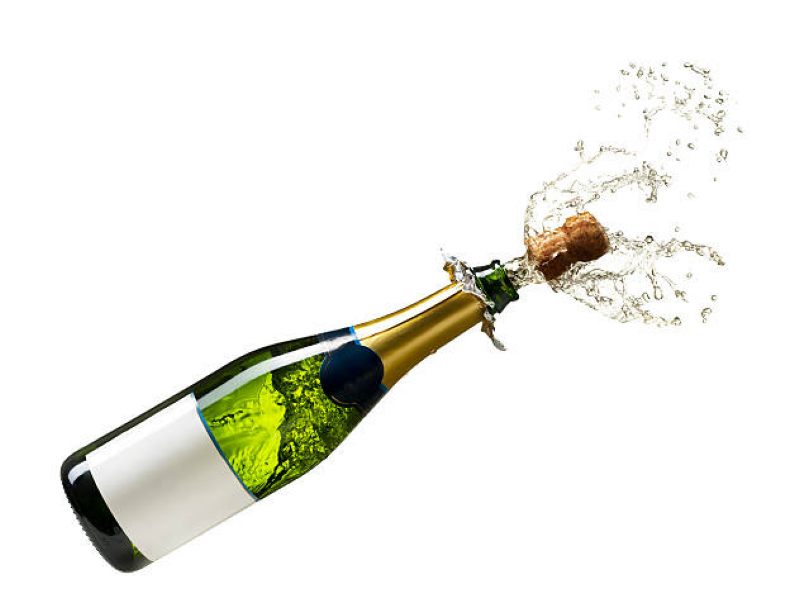

In [ ]:
# @title Do you think you need a retry
#.
name = input('So who is the Murderer: ')
if name.lower() == "jeremy bowers":
  print('''

  Congrats again, you found the murderer! But He is not the Mastermind behind the murder. Think some more..''')
elif name.lower() == "miranda priestly":
  print('''

  Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time.
  Time to break out the champagne!''')
  plt.figure(figsize=(10, 8))
  plt.imshow(img3)
  plt.axis('off')
  plt.show()
else:
  print('Wrong Suspect')

# Web Scraping

In [ ]:
# @title Installing requests and BeautifulSoup
!pip install requests
!pip install beautifulsoup4

##Importing Files

In [ ]:
import requests
from bs4 import BeautifulSoup as bfs
response = requests.get(url)
soup = bfs(response.text, 'html.parser')

In [ ]:
#Checking Response Code
response.status_code

200

##Using loops to scrap data

In [ ]:
items = soup.select('.product_pod')
names=[]
titles = [item.select('a')[1]['title'] for item in items]
for title in titles:
  names.append(title)
names

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [ ]:
price = soup.find_all('article',class_='product_pod')[0].find('p', class_='price_color').text
print(price)

Â£51.77


In [ ]:
rating = soup.find_all('article',class_='product_pod')[0].p.attrs['class'][1]
rating

'Three'

In [ ]:
stock = soup.find(class_="instock availability").text.strip()
print(stock)

In stock


In [ ]:
soup.find('title').text.strip()

'All products | Books to Scrape - Sandbox'

In [ ]:
books_tag = soup.find_all('article',class_ ='product_pod')
book_tag = books_tag[0]
#print(book_tag)

##Creating a Func for Scraping


In [ ]:
import requests
from bs4 import BeautifulSoup as bfs
def Web_page_scrap_func(url):
  response = requests.get(url)
  if response.status_code == 200:
      soup = bfs(response.text, 'html.parser')
      books = []
      for book in soup.find_all('article', class_='product_pod'):
          title = book.h3.a.attrs['title']
          price = book.find('p', class_='price_color').text
          price = price[1:]
          rating = book.p.attrs['class'][1]
          stock = soup.find(class_="instock availability").text.strip()
          link = url + book.h3.a['href']
          books.append({'Title': title, 'Price': price,'Stock':stock, 'Rating': rating, 'Link': link})
      df = pd.DataFrame(books)
      return df
  else:
      print(f"Failed to retrieve the page. Status code: {response.status_code}")

In [ ]:
df = Web_page_scrap_func('http://books.toscrape.com/')
print(df)

                                                Title   Price     Stock  \
0                                A Light in the Attic  £51.77  In stock   
1                                  Tipping the Velvet  £53.74  In stock   
2                                          Soumission  £50.10  In stock   
3                                       Sharp Objects  £47.82  In stock   
4               Sapiens: A Brief History of Humankind  £54.23  In stock   
5                                     The Requiem Red  £22.65  In stock   
6   The Dirty Little Secrets of Getting Your Dream...  £33.34  In stock   
7   The Coming Woman: A Novel Based on the Life of...  £17.93  In stock   
8   The Boys in the Boat: Nine Americans and Their...  £22.60  In stock   
9                                     The Black Maria  £52.15  In stock   
10     Starving Hearts (Triangular Trade Trilogy, #1)  £13.99  In stock   
11                              Shakespeare's Sonnets  £20.66  In stock   
12                       

In [ ]:
df.shape

(20, 5)

In [ ]:
columns = ['Title', 'Price','Stock', 'Rating', 'Link']
doc = pd.DataFrame(columns=columns)
print(doc)

Empty DataFrame
Columns: [Title, Price, Stock, Rating, Link]
Index: []


In [ ]:
def generate_page_url(base_url, page_num):
    if page_num == 1:
        return base_url
    else:
        return f"{base_url}catalogue/page-{page_num}.html"
url1 = "http://books.toscrape.com/"
num_pages = 50
dfs = []
for page_num in range(1, num_pages + 1):
    url = generate_page_url(url1, page_num)
    df = Web_page_scrap_func(url)
    dfs.append(df)
doc = pd.concat(dfs, ignore_index=True)
print(doc)

                                                 Title   Price     Stock  \
0                                 A Light in the Attic  £51.77  In stock   
1                                   Tipping the Velvet  £53.74  In stock   
2                                           Soumission  £50.10  In stock   
3                                        Sharp Objects  £47.82  In stock   
4                Sapiens: A Brief History of Humankind  £54.23  In stock   
..                                                 ...     ...       ...   
995  Alice in Wonderland (Alice's Adventures in Won...  £55.53  In stock   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)  £57.06  In stock   
997  A Spy's Devotion (The Regency Spies of London #1)  £16.97  In stock   
998                1st to Die (Women's Murder Club #1)  £53.98  In stock   
999                 1,000 Places to See Before You Die  £26.08  In stock   

    Rating                                               Link  
0    Three  http://book

In [ ]:
doc.shape

(1000, 5)

In [ ]:
doc.to_csv('/content/gdrive/My Drive/python_docs/final_result.csv', index=False)
print("DataFrame saved to 'final_result.csv'")

DataFrame saved to 'final_result.csv'


#Thanks !!!